# project: EDA Project on Laptops Brand Analysis

In [ ]:
# problem statement:-
  

# import libraries

In [829]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd

# WEB SCRAPPING

In [99]:
sprice=[]
actual_price=[]
discount=[]   
ratings=[]
brand=[]
ram=[]
rom=[]
warrenty=[]
processor=[]
size=[]
for i in range(1,91):
    page=requests.get(f"https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}")
    soup=BeautifulSoup(page.text)
    container=soup.find_all("div",class_="_2kHMtA")
    for i in container:
        text= i.find("div",class_="_30jeq3 _1_WHN1")
        if text:
            sprice.append(text.text)
        else:
            sprice.append(np.nan)

        text=i.find("div",class_="_3I9_wc _27UcVY")
        if text:
            actual_price.append(text.text)
        else:
             actual_price.append(np.nan)  
                
        text=i.find("div",class_="_3LWZlK")
        if text:
            ratings.append(text.text)
        else:
            ratings.append(np.nan)  
            
        text=i.find("div",class_="fMghEO").text
        regex=re.findall("\d\s*Year",text)
        if regex:
            warrenty.append(regex[0])
        else:
            warrenty.append(np.nan)

        text=i.find("div",class_="_3Ay6Sb")
        if text:
            discount.append(text.text)
        else:
            discount.append(np.nan)
            
        text=i.find("div",class_="_4rR01T").text
        name=text.split()[0]
        if name:
            brand.append(name)
        else:
            brand.append(np.nan)
    
        text=i.find("div",class_="_4rR01T").text
        regex=re.findall("\((\d+\sGB)\/",text)
        if regex:
            ram.append(regex[0])
        else:
            ram.append(np.nan)
            
        text=i.find("div",class_="_4rR01T").text
        regex=re.findall("\/(\d+\s\w+\s\w+)",text)
        if regex:
            rom.append(regex[0])
        else:
            rom.append(np.nan)
       
        text=i.find("li",class_="rgWa7D").text
        regex=re.findall(".+\w+?cessor",text)
        if regex:
            processor.append(regex[0])
        else:
            processor.append(np.nan)
        
        text = i.find("div", class_="fMghEO").text
        regex = re.findall(r"cm\s\((.*)\)\sDisplay", text, re.IGNORECASE)
        if regex:
            size.extend(regex)
        else:
            size.append(np.nan)

# -->Here we collected the laptops data from the flipcart website
# -->And created a container for all the collection of data to get the text data from the html code of flipkart data
# -->We created an empty lists for every column to import the data collected from the container by using the loop and regex method using patterns
# -->All the column are set under a single loop with required pages of range 91 
# -->Finally all the columns be  imported based the pattern given by the regex method

In [ ]:
# finding the length of all the columns and to check weather all the columns are equal or not

In [81]:
print(len(actual_price))
print(len(sprice))
print(len(ratings))
print(len(warrenty))
print(len(discount))
print(len(brand))
print(len(processor))
print(len(ram))
print(len(rom))
print(len(size))

840
840
840
840
840
840
840
840
840
840


In [ ]:
# creating dataset by naming the datacolumns by using the dictionaries

In [423]:
laptops={"Brand":brand,"Sale Price":sprice,"Actual Price":actual_price,"Discounts":discount,"Ratings":ratings,"Warrenty":warrenty,"ram":ram,"rom":rom,"processor":processor,"size":size}

In [ ]:
# Creating the DataFrame for the dataset

In [424]:
Lap=pd.DataFrame(laptops)

In [ ]:
# checking the dataframe containing duplicates or not

In [425]:
Lap[Lap.duplicated()]

Brand Sale Price Actual Price Discounts Ratings Warrenty    ram  \
28       HP    ₹47,990      ₹63,628   24% off     4.2   1 Year   8 GB   
29       HP    ₹52,990      ₹66,769   20% off     4.1   1 Year   8 GB   
32    CHUWI    ₹15,990      ₹34,990   54% off     3.4   1 Year   4 GB   
33    CHUWI    ₹17,990      ₹34,990   48% off     3.7   1 Year   8 GB   
38   Lenovo    ₹59,990      ₹77,990   23% off       4   1 Year   8 GB   
..      ...        ...          ...       ...     ...      ...    ...   
585   CHUWI    ₹17,990      ₹34,990   48% off     3.7   1 Year   8 GB   
590  Lenovo    ₹59,990      ₹77,990   23% off       4   1 Year   8 GB   
591  Lenovo    ₹69,990      ₹91,290   23% off     4.3   1 Year  16 GB   
594  Lenovo    ₹74,990      ₹97,790   23% off     4.4   1 Year   8 GB   
595  Lenovo  ₹1,14,990    ₹1,95,890   41% off     4.5   3 Year  16 GB   

            rom                        processor       size  
28   512 GB SSD  AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
29   512 GB SSD  AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
32   128 GB SSD                              NaN  11.6 inch  
33   256 GB SSD                              NaN  14.1 inch  
38   512 GB SSD  AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
..          ...                              ...        ...  
585  256 GB SSD                              NaN  14.1 inch  
590  512 GB SSD  AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
591  512 GB SSD  AMD Ryzen 5 Hexa Core Processor  15.6 inch  
594  512 GB SSD  AMD Ryzen 7 Octa Core Processor  15.6 inch  
595    1 TB SSD  AMD Ryzen 7 Octa Core Processor    16 inch  

[255 rows x 10 columns]

In [ ]:
# Here we dropped the duplicated rows from the dataframe 

In [ ]:
Lap.drop_duplicates(inplace=True)

In [ ]:
# Converting the dataframe to csv file using the dataframe_name.to_csv()

In [431]:
Lap.to_csv("D:\C\DESK\Downloads\EVENT PROJECT DOC.docx.csv")

In [432]:
Lap

Brand Sale Price Actual Price Discounts Ratings Warrenty    ram  \
0         HP    ₹35,999      ₹47,716   24% off     4.3   1 Year   8 GB   
1         HP    ₹27,890      ₹31,990   12% off     3.8   1 Year   8 GB   
2         HP    ₹47,990      ₹63,628   24% off     4.2   1 Year   8 GB   
3         HP    ₹52,990      ₹66,769   20% off     4.1   1 Year   8 GB   
4       ASUS    ₹37,990      ₹49,990   24% off     4.2   1 Year   8 GB   
..       ...        ...          ...       ...     ...      ...    ...   
593     Acer    ₹63,456      ₹99,990   36% off     4.5   1 Year   8 GB   
596   Lenovo    ₹62,990      ₹68,811    8% off     4.3   1 Year   8 GB   
597  Infinix    ₹54,990      ₹69,999   21% off     3.8   1 Year  16 GB   
598       HP    ₹54,590      ₹64,491   15% off     4.4   1 Year   8 GB   
599   Lenovo    ₹58,990      ₹89,990   34% off     NaN      NaN  16 GB   

            rom                          processor       size  
0    512 GB SSD    AMD Ryzen 3 Quad Core Processor    14 Inch  
1    512 GB SSD  Intel Celeron Dual Core Processor  15.6 inch  
2    512 GB SSD    AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
3    512 GB SSD    AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
4    512 GB SSD            Intel Core i3 Processor    14 Inch  
..          ...                                ...        ...  
593  512 GB SSD            Intel Core i5 Processor  15.6 inch  
596  512 GB SSD    AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
597  512 GB SSD            Intel Core i7 Processor    14 Inch  
598  512 GB SSD    AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
599  512 GB SSD            Intel Core i5 Processor    16 inch  

[345 rows x 10 columns]

In [ ]:
# extracting the converted csv file to dataframe using pandas.read_csv()

In [928]:
data=pd.read_csv(r"D:\C\DESK\Downloads\laptops.csv")

In [929]:
data

Unnamed: 0      Brand Sale Price Actual Price Discounts  Ratings  \
0             0         HP    ₹47,990      ₹63,628   24% off      4.2   
1             1         HP    ₹52,990      ₹66,769   20% off      4.1   
2             2     Lenovo    ₹24,990      ₹42,032   40% off      4.0   
3             3         HP    ₹29,490      ₹39,995   26% off      4.2   
4             4       ASUS    ₹43,990      ₹69,990   37% off      4.3   
..          ...        ...        ...          ...       ...      ...   
473         834  MICROSOFT  ₹1,13,990    ₹1,16,999    2% off      NaN   
474         835         HP    ₹37,999      ₹52,251   27% off      4.0   
475         837       ASUS    ₹28,900      ₹38,990   25% off      4.1   
476         838      APPLE  ₹1,89,900          NaN       NaN      NaN   
477         839    SAMSUNG  ₹1,55,990    ₹1,72,214    9% off      NaN   

    Warrenty    ram         rom                          processor       size  
0     1 Year   8 GB  512 GB SSD    AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
1     1 Year   8 GB  512 GB SSD    AMD Ryzen 5 Hexa Core Processor  15.6 Inch  
2     1 Year   8 GB  256 GB SSD  Intel Celeron Dual Core Processor  15.6 inch  
3     1 Year   8 GB  512 GB SSD    AMD Ryzen 3 Dual Core Processor  15.6 Inch  
4     1 Year   8 GB  512 GB SSD            Intel Core i5 Processor  15.6 Inch  
..       ...    ...         ...                                ...        ...  
473   1 Year   8 GB  256 GB SSD            Intel Core i5 Processor        NaN  
474   1 Year   8 GB  512 GB SSD    AMD Ryzen 5 Dual Core Processor  15.6 inch  
475   1 Year   4 GB  256 GB SSD     Intel Pentium Silver Processor    14 Inch  
476   1 Year   8 GB    1 TB SSD                 Apple M3 Processor    14 Inch  
477   1 Year  16 GB    1 TB SSD            Intel Core i7 Processor    14 Inch  

[478 rows x 11 columns]

In [930]:
# dropping the useless indexed column where inplace=True will remove permanantly from dataframe

In [931]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [932]:
#-->from the above data frame we can see that some of the columns have to be manupulated by using the following code

In [933]:
data['Sale Price']=data['Sale Price'].replace('[^\d]',"",regex=True)
data['Actual Price']=data['Actual Price'].replace('[^\d]',"",regex=True)
data['Discounts']=data['Discounts'].replace('[^\d]',"",regex=True)
data['size']=data['size'].replace('\s.*',"",regex=True)
data['Warrenty']=data['Warrenty'].replace('[^\d]',"",regex=True)

In [934]:
data

Brand Sale Price Actual Price Discounts  Ratings Warrenty    ram  \
0           HP      47990        63628        24      4.2        1   8 GB   
1           HP      52990        66769        20      4.1        1   8 GB   
2       Lenovo      24990        42032        40      4.0        1   8 GB   
3           HP      29490        39995        26      4.2        1   8 GB   
4         ASUS      43990        69990        37      4.3        1   8 GB   
..         ...        ...          ...       ...      ...      ...    ...   
473  MICROSOFT     113990       116999         2      NaN        1   8 GB   
474         HP      37999        52251        27      4.0        1   8 GB   
475       ASUS      28900        38990        25      4.1        1   4 GB   
476      APPLE     189900          NaN       NaN      NaN        1   8 GB   
477    SAMSUNG     155990       172214         9      NaN        1  16 GB   

            rom                          processor  size  
0    512 GB SSD    AMD Ryzen 5 Hexa Core Processor  15.6  
1    512 GB SSD    AMD Ryzen 5 Hexa Core Processor  15.6  
2    256 GB SSD  Intel Celeron Dual Core Processor  15.6  
3    512 GB SSD    AMD Ryzen 3 Dual Core Processor  15.6  
4    512 GB SSD            Intel Core i5 Processor  15.6  
..          ...                                ...   ...  
473  256 GB SSD            Intel Core i5 Processor   NaN  
474  512 GB SSD    AMD Ryzen 5 Dual Core Processor  15.6  
475  256 GB SSD     Intel Pentium Silver Processor    14  
476    1 TB SSD                 Apple M3 Processor    14  
477    1 TB SSD            Intel Core i7 Processor    14  

[478 rows x 10 columns]

In [935]:
# using data.info() to get the information about the data

In [936]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         478 non-null    object 
 1   Sale Price    478 non-null    object 
 2   Actual Price  464 non-null    object 
 3   Discounts     464 non-null    object 
 4   Ratings       392 non-null    float64
 5   Warrenty      451 non-null    object 
 6   ram           475 non-null    object 
 7   rom           475 non-null    object 
 8   processor     472 non-null    object 
 9   size          448 non-null    object 
dtypes: float64(1), object(9)
memory usage: 37.5+ KB


In [937]:
# -->Here we got 478 no of rows and 10 no of columns filled will null values as well
# -->also each column have their different datatype with a total memory size of 37.5+ KB

In [938]:
#creating a copy of the data for saving the original data

In [939]:
datac=data.copy() 

In [940]:
# using Value_counts() to know the count of all the individual values of that particular column

In [941]:
data["Brand"].value_counts()

ASUS         108
HP            86
Lenovo        82
DELL          58
Acer          48
MSI           35
APPLE         18
Infinix       15
ZEBRONICS      7
SAMSUNG        5
CHUWI          4
Wings          4
realme         3
Ultimus        2
Primebook      1
LG             1
MICROSOFT      1
Name: Brand, dtype: int64

In [942]:
data["Sale Price"].value_counts()

59990     12
52990     10
34990      9
44990      8
54990      7
          ..
309490     1
38800      1
109699     1
84990      1
155990     1
Name: Sale Price, Length: 267, dtype: int64

In [943]:
data["Actual Price"].value_counts()

49990     8
79990     7
50990     7
86990     6
69990     5
         ..
58175     1
75059     1
102990    1
249999    1
172214    1
Name: Actual Price, Length: 338, dtype: int64

In [944]:
data["Actual Price"].value_counts()

49990     8
79990     7
50990     7
86990     6
69990     5
         ..
58175     1
75059     1
102990    1
249999    1
172214    1
Name: Actual Price, Length: 338, dtype: int64

In [945]:
data["Ratings"].value_counts()

4.3    76
4.2    67
4.4    59
4.1    41
4.0    30
4.5    23
3.7    17
4.6    12
4.7     9
3.8     9
3.9     9
4.8     8
3.6     8
3.4     6
3.3     5
5.0     5
4.9     3
3.5     3
3.0     1
2.9     1
Name: Ratings, dtype: int64

In [946]:
data["Warrenty"].value_counts()

1    413
2     33
3      5
Name: Warrenty, dtype: int64

In [947]:
data["ram"].value_counts()

8 GB     250
16 GB    182
4 GB      23
32 GB     16
18 GB      3
12 GB      1
Name: ram, dtype: int64

In [948]:
data["rom"].value_counts()

512 GB SSD        338
1 TB SSD           54
256 GB SSD         45
1 TB HDD           11
128 GB EMMC         6
64 GB EMMC          5
2 TB SSD            4
128 GB SSD          3
1 TB SS             2
8 Threads Core      1
256 GB HDD          1
4 TB SSD            1
512 GB S            1
512 GB HDD          1
64 GB SSD           1
1 TB S              1
Name: rom, dtype: int64

In [949]:
data["processor"].value_counts()

Intel Core i5 Processor              145
Intel Core i3 Processor               82
Intel Core i7 Processor               51
AMD Ryzen 5 Hexa Core Processor       47
AMD Ryzen 7 Octa Core Processor       39
Intel Celeron Dual Core Processor     21
AMD Ryzen 3 Quad Core Processor       13
Processor                             10
Intel Core i9 Processor               10
AMD Ryzen 5 Quad Core Processor        7
Apple M2 Processor                     6
AMD Athlon Dual Core Processor         5
AMD Ryzen 3 Dual Core Processor        4
AMD Ryzen 9 Octa Core Processor        4
Apple M3 Pro Processor                 3
Apple M1 Processor                     3
Apple M3 Processor                     2
Intel Hexa Core i5 Processor           2
AMD Ryzen 5 Dual Core Processor        2
AMD Ryzen 5 Processor                  2
Intel Celeron Quad Core Processor      2
MediaTek Kompanio 500 Processor        1
MediaTek MT8183 Processor              1
Intel Pentium Quad Core Processor      1
AMD Dual Core Pr

In [950]:
data["size"].value_counts()

15.6     262
14       100
16        29
13.3      12
17.3       6
14.1       5
16.1       5
38         5
13.6       4
39.62      3
14.96      2
15         2
11.6       2
18         2
16.2       2
17         1
14.9       1
16.6       1
15.3       1
13.4       1
15.36      1
13.78      1
Name: size, dtype: int64

In [951]:
# -->using isna().sum( to know how many null values are there in the particular data column)

In [952]:
data["Brand"].isna().sum()

0

In [953]:
data["Sale Price"].isna().sum()

0

In [954]:
data["Actual Price"].isna().sum()

14

In [955]:
data["Ratings"].isna().sum()

86

In [956]:
data["Warrenty"].isna().sum()

27

In [957]:
data["ram"].isna().sum()

3

In [958]:
data["rom"].isna().sum()

3

In [959]:
data["size"].isna().sum()

30

In [960]:
data["processor"].isna().sum()

6

In [961]:
# -->converting the  datatype of the data by using astype

In [962]:
datac["Sale Price"]=datac["Sale Price"].astype(np.int64)

In [963]:
datac["Actual Price"]=datac["Actual Price"].astype('float')

In [964]:
datac["Discounts"]=datac["Discounts"].astype('float')

In [965]:
# filling the null values of every column based on the type of the dataBrand 

In [966]:
datac['ram']=datac.groupby('Brand')['ram'].transform(lambda x:x.fillna(x.mode()[0]))

In [967]:
datac['rom']=datac.groupby('Brand')['rom'].transform(lambda x:x.fillna(x.mode()[0]))

In [968]:
datac['processor']=datac.groupby('Brand')['processor'].transform(lambda x:x.fillna(x.mode()[0]))

In [969]:
datac[datac.Ratings.isna()==True] # Fill the null values in the Rating column with the mean 
datac['Ratings']=datac.groupby('Brand')['Ratings'].transform(lambda x: x.fillna(round(x.mean(),1)))

In [970]:
# --> Now let us know the count of data point are equal for the columns or not

In [971]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         478 non-null    object 
 1   Sale Price    478 non-null    int64  
 2   Actual Price  464 non-null    float64
 3   Discounts     464 non-null    float64
 4   Ratings       476 non-null    float64
 5   Warrenty      451 non-null    object 
 6   ram           478 non-null    object 
 7   rom           478 non-null    object 
 8   processor     478 non-null    object 
 9   size          448 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 37.5+ KB


In [972]:
# -->though the data containg NaN values is filled with their with their cutten

In [973]:
datac[datac.Ratings.isna()==True]

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty   ram  \
333         LG       76190      127000.0       40.0      NaN      NaN  8 GB   
473  MICROSOFT      113990      116999.0        2.0      NaN        1  8 GB   

            rom                processor size  
333  512 GB SSD  Intel Core i5 Processor   14  
473  256 GB SSD  Intel Core i5 Processor  NaN

In [974]:
datac.drop(index=datac[datac["Ratings"].isna()==True].index,inplace=True)

In [975]:
# filling the null values of every column based on the type of the dataBrand 

In [976]:
datac['Actual Price']=datac.groupby('Brand')['Actual Price'].transform(lambda x: x.fillna(x.mean()))

In [977]:
datac['Discounts']=datac.groupby('Brand')['Discounts'].transform(lambda x: x.fillna(x.mean()))

In [978]:
# --> Now let us know the count of data point are equal for the columns or not

In [979]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 477
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         476 non-null    object 
 1   Sale Price    476 non-null    int64  
 2   Actual Price  476 non-null    float64
 3   Discounts     476 non-null    float64
 4   Ratings       476 non-null    float64
 5   Warrenty      450 non-null    object 
 6   ram           476 non-null    object 
 7   rom           476 non-null    object 
 8   processor     476 non-null    object 
 9   size          447 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 40.9+ KB


In [980]:
# --> For proper understanding let us change the column names

In [981]:
datac.rename({"ram":"RAM(GB)","rom":"ROM","size":"size(inch)"},axis=1,inplace=True)

In [982]:
# filling the null values of every column based on the type of the dataBrand 

In [983]:
datac['size(inch)']=datac.groupby('Brand')['size(inch)'].transform(lambda x: x.fillna(x.mode()[0]))

In [984]:
# --> Check weather the warrenty column containing null values are not

In [985]:
datac[datac["Warrenty"].isna()==True]

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty RAM(GB)  \
66        HP       24999       35208.0       28.0      4.2      NaN    8 GB   
76   Infinix       33990       64990.0       47.0      4.2      NaN   16 GB   
87      DELL       45989       68000.0       32.0      4.1      NaN    8 GB   
91      Acer       31690       46995.0       32.0      4.4      NaN    8 GB   
129  Infinix       28990       54990.0       47.0      4.1      NaN    8 GB   
131       HP       29790       63426.0       53.0      4.4      NaN    8 GB   
158   Lenovo       45990       99999.0       54.0      4.8      NaN    8 GB   
207       HP       33999       44771.0       24.0      4.8      NaN    8 GB   
218     ASUS       59990       77990.0       23.0      4.3      NaN    8 GB   
228   Lenovo       48990       99999.0       51.0      4.2      NaN    8 GB   
250     Acer       68990       99999.0       31.0      4.3      NaN   16 GB   
304   Lenovo       60990       84890.0       28.0      4.2      NaN   16 GB   
313     DELL       51990       81215.0       35.0      4.0      NaN    8 GB   
315     DELL       70590       99040.0       28.0      4.0      NaN    8 GB   
320     ASUS       71990       97990.0       26.0      4.8      NaN    8 GB   
327   Lenovo       21990       38000.0       42.0      3.7      NaN    4 GB   
335  Infinix       48990       69990.0       30.0      4.4      NaN   16 GB   
347       HP       34490       43763.0       21.0      3.5      NaN    8 GB   
350       HP       52990       66827.0       20.0      4.5      NaN    8 GB   
361     DELL       76990       98800.0       22.0      3.8      NaN   16 GB   
371     DELL       52800       74619.0       29.0      3.3      NaN    8 GB   
425   Lenovo       37380       67090.0       44.0      4.2      NaN    8 GB   
446   Lenovo       58990       89990.0       34.0      4.2      NaN   16 GB   
450     ASUS       43990       70990.0       38.0      4.3      NaN   16 GB   
460     DELL      186999      265000.0       29.0      4.0      NaN   16 GB   
466     DELL       59990       89650.0       33.0      3.3      NaN   16 GB   

            ROM                        processor size(inch)  
66   512 GB SSD  AMD Ryzen 3 Dual Core Processor       15.6  
76   512 GB SSD          Intel Core i5 Processor         14  
87   512 GB SSD          Intel Core i5 Processor       15.6  
91   512 GB SSD          Intel Core i3 Processor       15.6  
129  512 GB SSD          Intel Core i3 Processor         14  
131  512 GB SSD  AMD Ryzen 5 Dual Core Processor         14  
158  512 GB SSD          Intel Core i5 Processor         14  
207  256 GB SSD  AMD Ryzen 5 Hexa Core Processor       15.6  
218  512 GB SSD     Intel Hexa Core i5 Processor       15.6  
228  512 GB SSD          Intel Core i5 Processor         14  
250  512 GB SSD  AMD Ryzen 5 Hexa Core Processor       15.6  
304  512 GB SSD            AMD Ryzen 5 Processor       15.6  
313  512 GB SSD          Intel Core i5 Processor         14  
315  512 GB SSD  AMD Ryzen 5 Hexa Core Processor       15.6  
320    1 TB SSD          Intel Core i5 Processor       15.6  
327  256 GB SSD   AMD Athlon Dual Core Processor         14  
335  512 GB SSD          Intel Core i7 Processor         14  
347  512 GB SSD          Intel Core i3 Processor         14  
350  512 GB SSD          Intel Core i5 Processor       15.6  
361  512 GB SSD          Intel Core i5 Processor         14  
371  512 GB SSD          Intel Core i5 Processor       15.6  
425  512 GB SSD          Intel Core i3 Processor       15.6  
446  512 GB SSD          Intel Core i5 Processor         16  
450  512 GB SSD  AMD Ryzen 5 Quad Core Processor         14  
460    1 TB SSD          Intel Core i7 Processor       15.6  
466  512 GB SSD          Intel Core i5 Processor         14

In [986]:
# --> Replace the null values by zero

In [987]:
datac.replace({"Warrenty":[np.nan]},1,inplace=True)

In [988]:
datac

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty RAM(GB)  \
0         HP       47990       63628.0  24.000000      4.2        1    8 GB   
1         HP       52990       66769.0  20.000000      4.1        1    8 GB   
2     Lenovo       24990       42032.0  40.000000      4.0        1    8 GB   
3         HP       29490       39995.0  26.000000      4.2        1    8 GB   
4       ASUS       43990       69990.0  37.000000      4.3        1    8 GB   
..       ...         ...           ...        ...      ...      ...     ...   
472     Acer       67990       92999.0  26.000000      4.3        1    8 GB   
474       HP       37999       52251.0  27.000000      4.0        1    8 GB   
475     ASUS       28900       38990.0  25.000000      4.1        1    4 GB   
476    APPLE      189900      172650.0   6.416667      4.6        1    8 GB   
477  SAMSUNG      155990      172214.0   9.000000      4.3        1   16 GB   

            ROM                          processor size(inch)  
0    512 GB SSD    AMD Ryzen 5 Hexa Core Processor       15.6  
1    512 GB SSD    AMD Ryzen 5 Hexa Core Processor       15.6  
2    256 GB SSD  Intel Celeron Dual Core Processor       15.6  
3    512 GB SSD    AMD Ryzen 3 Dual Core Processor       15.6  
4    512 GB SSD            Intel Core i5 Processor       15.6  
..          ...                                ...        ...  
472  512 GB SSD    AMD Ryzen 5 Hexa Core Processor       15.6  
474  512 GB SSD    AMD Ryzen 5 Dual Core Processor       15.6  
475  256 GB SSD     Intel Pentium Silver Processor         14  
476    1 TB SSD                 Apple M3 Processor         14  
477    1 TB SSD            Intel Core i7 Processor         14  

[476 rows x 10 columns]

In [989]:
# --> due to impact Discount column got mutiple decimals so lets change it by using np.round method

In [990]:
datac["Discounts"]=np.round(datac["Discounts"],decimals=False)

In [991]:
datac

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty RAM(GB)  \
0         HP       47990       63628.0       24.0      4.2        1    8 GB   
1         HP       52990       66769.0       20.0      4.1        1    8 GB   
2     Lenovo       24990       42032.0       40.0      4.0        1    8 GB   
3         HP       29490       39995.0       26.0      4.2        1    8 GB   
4       ASUS       43990       69990.0       37.0      4.3        1    8 GB   
..       ...         ...           ...        ...      ...      ...     ...   
472     Acer       67990       92999.0       26.0      4.3        1    8 GB   
474       HP       37999       52251.0       27.0      4.0        1    8 GB   
475     ASUS       28900       38990.0       25.0      4.1        1    4 GB   
476    APPLE      189900      172650.0        6.0      4.6        1    8 GB   
477  SAMSUNG      155990      172214.0        9.0      4.3        1   16 GB   

            ROM                          processor size(inch)  
0    512 GB SSD    AMD Ryzen 5 Hexa Core Processor       15.6  
1    512 GB SSD    AMD Ryzen 5 Hexa Core Processor       15.6  
2    256 GB SSD  Intel Celeron Dual Core Processor       15.6  
3    512 GB SSD    AMD Ryzen 3 Dual Core Processor       15.6  
4    512 GB SSD            Intel Core i5 Processor       15.6  
..          ...                                ...        ...  
472  512 GB SSD    AMD Ryzen 5 Hexa Core Processor       15.6  
474  512 GB SSD    AMD Ryzen 5 Dual Core Processor       15.6  
475  256 GB SSD     Intel Pentium Silver Processor         14  
476    1 TB SSD                 Apple M3 Processor         14  
477    1 TB SSD            Intel Core i7 Processor         14  

[476 rows x 10 columns]

In [992]:
# --> Now let us know the count of data point are equal for the columns or not

In [993]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 477
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         476 non-null    object 
 1   Sale Price    476 non-null    int64  
 2   Actual Price  476 non-null    float64
 3   Discounts     476 non-null    float64
 4   Ratings       476 non-null    float64
 5   Warrenty      476 non-null    object 
 6   RAM(GB)       476 non-null    object 
 7   ROM           476 non-null    object 
 8   processor     476 non-null    object 
 9   size(inch)    476 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 40.9+ KB


In [994]:
datac=datac.astype({"Sale Price":np.int32,"Actual Price":float,"Warrenty":object,"size(inch)":float})

In [995]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 477
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         476 non-null    object 
 1   Sale Price    476 non-null    int32  
 2   Actual Price  476 non-null    float64
 3   Discounts     476 non-null    float64
 4   Ratings       476 non-null    float64
 5   Warrenty      476 non-null    object 
 6   RAM(GB)       476 non-null    object 
 7   ROM           476 non-null    object 
 8   processor     476 non-null    object 
 9   size(inch)    476 non-null    float64
dtypes: float64(4), int32(1), object(5)
memory usage: 39.0+ KB


In [996]:
datac

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty RAM(GB)  \
0         HP       47990       63628.0       24.0      4.2        1    8 GB   
1         HP       52990       66769.0       20.0      4.1        1    8 GB   
2     Lenovo       24990       42032.0       40.0      4.0        1    8 GB   
3         HP       29490       39995.0       26.0      4.2        1    8 GB   
4       ASUS       43990       69990.0       37.0      4.3        1    8 GB   
..       ...         ...           ...        ...      ...      ...     ...   
472     Acer       67990       92999.0       26.0      4.3        1    8 GB   
474       HP       37999       52251.0       27.0      4.0        1    8 GB   
475     ASUS       28900       38990.0       25.0      4.1        1    4 GB   
476    APPLE      189900      172650.0        6.0      4.6        1    8 GB   
477  SAMSUNG      155990      172214.0        9.0      4.3        1   16 GB   

            ROM                          processor  size(inch)  
0    512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6  
1    512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6  
2    256 GB SSD  Intel Celeron Dual Core Processor        15.6  
3    512 GB SSD    AMD Ryzen 3 Dual Core Processor        15.6  
4    512 GB SSD            Intel Core i5 Processor        15.6  
..          ...                                ...         ...  
472  512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6  
474  512 GB SSD    AMD Ryzen 5 Dual Core Processor        15.6  
475  256 GB SSD     Intel Pentium Silver Processor        14.0  
476    1 TB SSD                 Apple M3 Processor        14.0  
477    1 TB SSD            Intel Core i7 Processor        14.0  

[476 rows x 10 columns]

In [997]:
# --> For proper understanding let us change the column names

In [998]:
datac.rename({"Warrenty":"Warrenty(years)","ram":"RAM(GB)","rom":"ROM","size":"size(inch)"},axis=1,inplace=True)

In [999]:
datac

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty(years)  \
0         HP       47990       63628.0       24.0      4.2               1   
1         HP       52990       66769.0       20.0      4.1               1   
2     Lenovo       24990       42032.0       40.0      4.0               1   
3         HP       29490       39995.0       26.0      4.2               1   
4       ASUS       43990       69990.0       37.0      4.3               1   
..       ...         ...           ...        ...      ...             ...   
472     Acer       67990       92999.0       26.0      4.3               1   
474       HP       37999       52251.0       27.0      4.0               1   
475     ASUS       28900       38990.0       25.0      4.1               1   
476    APPLE      189900      172650.0        6.0      4.6               1   
477  SAMSUNG      155990      172214.0        9.0      4.3               1   

    RAM(GB)         ROM                          processor  size(inch)  
0      8 GB  512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6  
1      8 GB  512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6  
2      8 GB  256 GB SSD  Intel Celeron Dual Core Processor        15.6  
3      8 GB  512 GB SSD    AMD Ryzen 3 Dual Core Processor        15.6  
4      8 GB  512 GB SSD            Intel Core i5 Processor        15.6  
..      ...         ...                                ...         ...  
472    8 GB  512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6  
474    8 GB  512 GB SSD    AMD Ryzen 5 Dual Core Processor        15.6  
475    4 GB  256 GB SSD     Intel Pentium Silver Processor        14.0  
476    8 GB    1 TB SSD                 Apple M3 Processor        14.0  
477   16 GB    1 TB SSD            Intel Core i7 Processor        14.0  

[476 rows x 10 columns]

In [1000]:
# -->changing the data type of the RAM column by using regex for removing GB and finally converting to int type

In [1001]:
datac['RAM(GB)']=datac['RAM(GB)'].replace("[^0-9]","",regex=True).astype('int')

In [1002]:
datac['storage type'] = datac['ROM'].str.split().str[-1].replace("S","SSD")

In [1003]:
# Assuming 'ROM' column contains strings like "64 GB", "128 GB", etc.
# datac['storage type'] = datac['ROM'].str.split().str[-1]

In [1004]:
datac.drop(datac[datac["ROM"]=="8 Threads Core"].index,inplace=True)

In [1005]:
datac.drop(datac[datac['storage type']=='SS'].index,inplace=True)

In [1006]:
datac.drop(datac[datac['storage type']=='Core'].index,inplace=True)

In [1007]:
datac

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty(years)  \
0         HP       47990       63628.0       24.0      4.2               1   
1         HP       52990       66769.0       20.0      4.1               1   
2     Lenovo       24990       42032.0       40.0      4.0               1   
3         HP       29490       39995.0       26.0      4.2               1   
4       ASUS       43990       69990.0       37.0      4.3               1   
..       ...         ...           ...        ...      ...             ...   
472     Acer       67990       92999.0       26.0      4.3               1   
474       HP       37999       52251.0       27.0      4.0               1   
475     ASUS       28900       38990.0       25.0      4.1               1   
476    APPLE      189900      172650.0        6.0      4.6               1   
477  SAMSUNG      155990      172214.0        9.0      4.3               1   

     RAM(GB)         ROM                          processor  size(inch)  \
0          8  512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6   
1          8  512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6   
2          8  256 GB SSD  Intel Celeron Dual Core Processor        15.6   
3          8  512 GB SSD    AMD Ryzen 3 Dual Core Processor        15.6   
4          8  512 GB SSD            Intel Core i5 Processor        15.6   
..       ...         ...                                ...         ...   
472        8  512 GB SSD    AMD Ryzen 5 Hexa Core Processor        15.6   
474        8  512 GB SSD    AMD Ryzen 5 Dual Core Processor        15.6   
475        4  256 GB SSD     Intel Pentium Silver Processor        14.0   
476        8    1 TB SSD                 Apple M3 Processor        14.0   
477       16    1 TB SSD            Intel Core i7 Processor        14.0   

    storage type  
0            SSD  
1            SSD  
2            SSD  
3            SSD  
4            SSD  
..           ...  
472          SSD  
474          SSD  
475          SSD  
476          SSD  
477          SSD  

[473 rows x 11 columns]

In [1011]:
datac['ROM'] = datac['ROM'].replace("SSD","",regex=True)

In [1013]:
datac['ROM'] = datac['ROM'].replace("HDD","",regex=True)

In [1014]:
datac['ROM'] = datac['ROM'].replace("EMMC","",regex=True)

In [1015]:
datac['ROM'] = datac['ROM'].replace("S","",regex=True)

In [1018]:
datac['ROM'].value_counts()

512     342
1024     66
256      45
128       9
64        6
2048      4
4096      1
Name: ROM, dtype: int64

In [1017]:
def convert_storage(value):
    if 'TB' in value:
        return int(value.replace("TB ",""))*1024
    elif 'GB' in value:
        return int(value.replace('GB ',""))

# Applying the function to the 'Storage' column
datac['ROM'] = datac['ROM'].apply(convert_storage)

print(datac)


       Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty(years)  \
0         HP       47990       63628.0       24.0      4.2               1   
1         HP       52990       66769.0       20.0      4.1               1   
2     Lenovo       24990       42032.0       40.0      4.0               1   
3         HP       29490       39995.0       26.0      4.2               1   
4       ASUS       43990       69990.0       37.0      4.3               1   
..       ...         ...           ...        ...      ...             ...   
472     Acer       67990       92999.0       26.0      4.3               1   
474       HP       37999       52251.0       27.0      4.0               1   
475     ASUS       28900       38990.0       25.0      4.1               1   
476    APPLE      189900      172650.0        6.0      4.6               1   
477  SAMSUNG      155990      172214.0        9.0      4.3               1   

     RAM(GB)   ROM                          processor  size(inc

In [578]:
# datac['ROM'] = datac['ROM'].str.split().str[0:2]

In [574]:
datac['storage type'].value_counts()

SSD     449
HDD      13
EMMC     11
Name: storage type, dtype: int64

In [745]:
datac['ROM'].value_counts()

512 GB      341
1            65
256 GB       45
128 GB        9
64 GB         6
2             4
4             1
512 GB S      1
1  S          1
Name: ROM, dtype: int64

In [392]:
# --> Finally the data is cleaned completely without null values and converted data types

In [1019]:
datac

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty(years)  \
0         HP       47990       63628.0       24.0      4.2               1   
1         HP       52990       66769.0       20.0      4.1               1   
2     Lenovo       24990       42032.0       40.0      4.0               1   
3         HP       29490       39995.0       26.0      4.2               1   
4       ASUS       43990       69990.0       37.0      4.3               1   
..       ...         ...           ...        ...      ...             ...   
472     Acer       67990       92999.0       26.0      4.3               1   
474       HP       37999       52251.0       27.0      4.0               1   
475     ASUS       28900       38990.0       25.0      4.1               1   
476    APPLE      189900      172650.0        6.0      4.6               1   
477  SAMSUNG      155990      172214.0        9.0      4.3               1   

     RAM(GB)   ROM                          processor  size(inch) storage type  
0          8   512    AMD Ryzen 5 Hexa Core Processor        15.6          SSD  
1          8   512    AMD Ryzen 5 Hexa Core Processor        15.6          SSD  
2          8   256  Intel Celeron Dual Core Processor        15.6          SSD  
3          8   512    AMD Ryzen 3 Dual Core Processor        15.6          SSD  
4          8   512            Intel Core i5 Processor        15.6          SSD  
..       ...   ...                                ...         ...          ...  
472        8   512    AMD Ryzen 5 Hexa Core Processor        15.6          SSD  
474        8   512    AMD Ryzen 5 Dual Core Processor        15.6          SSD  
475        4   256     Intel Pentium Silver Processor        14.0          SSD  
476        8  1024                 Apple M3 Processor        14.0          SSD  
477       16  1024            Intel Core i7 Processor        14.0          SSD  

[473 rows x 11 columns]

In [394]:
# vizualization

In [395]:
# --> Importing libraries 

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss
import random as rd  
import statsmodels.api as sm

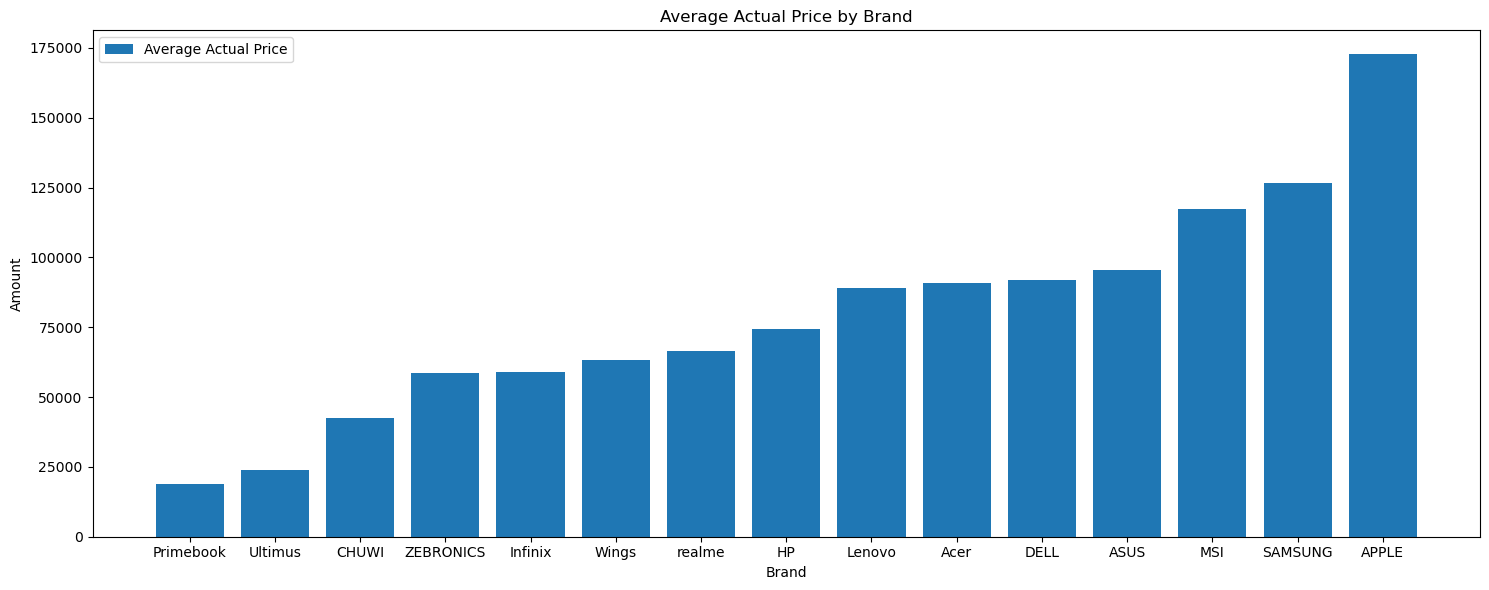

In [896]:
# Calculate average Actual Price by each brand
brand_avg = datac.groupby('Brand')[['Actual Price']].mean().reset_index().sort_values(by=["Actual Price"],ascending=True)

# Plotting average Actual Price and Discounts for each brand
plt.figure(figsize=(15, 6))
plt.bar(brand_avg['Brand'], brand_avg['Actual Price'], label='Average Actual Price')
plt.xlabel('Brand')
plt.ylabel('Amount')
plt.title('Average Actual Price by Brand')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

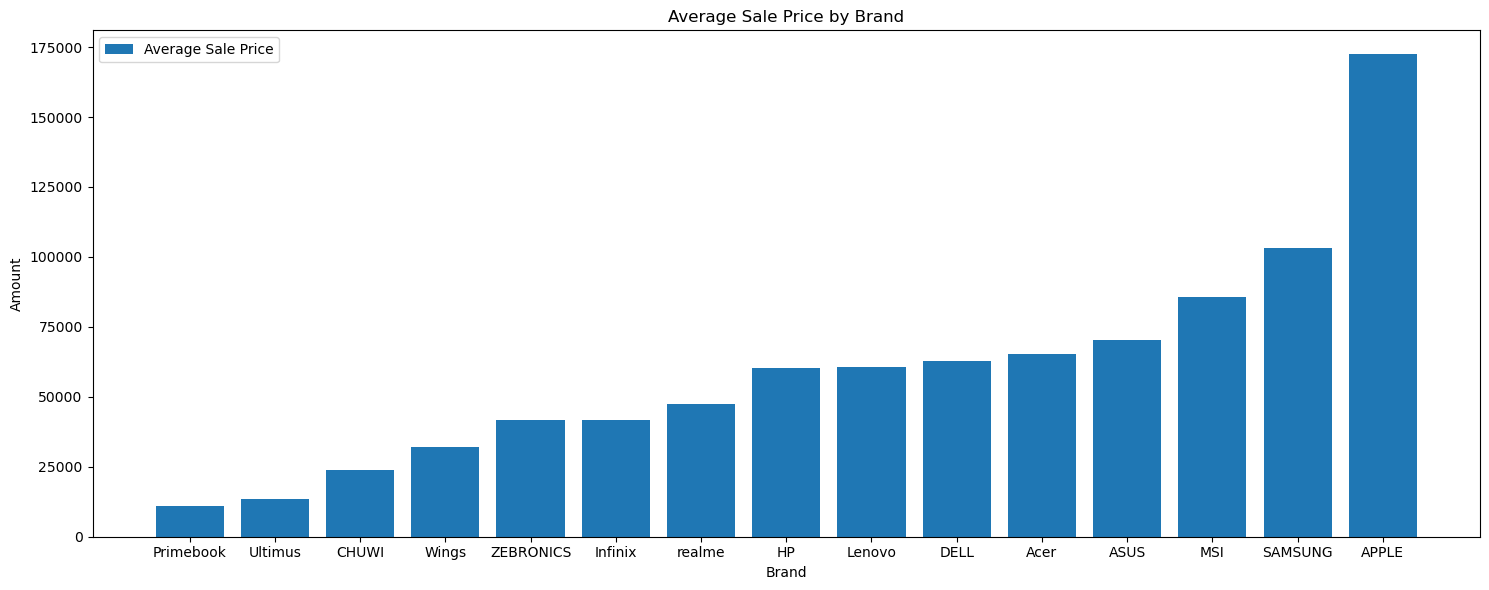

In [866]:
# Calculate average Sale Price and Discounts for each brand
brand_avg = datac.groupby('Brand')[['Sale Price', 'Discounts']].mean().reset_index().sort_values(by=["Sale Price"],ascending=True)

# Plotting average Sale Price and Discounts for each brand
plt.figure(figsize=(15, 6))
plt.bar(brand_avg['Brand'], brand_avg['Sale Price'], label='Average Sale Price')
plt.xlabel('Brand')
plt.ylabel('Amount')
plt.title('Average Sale Price by Brand')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

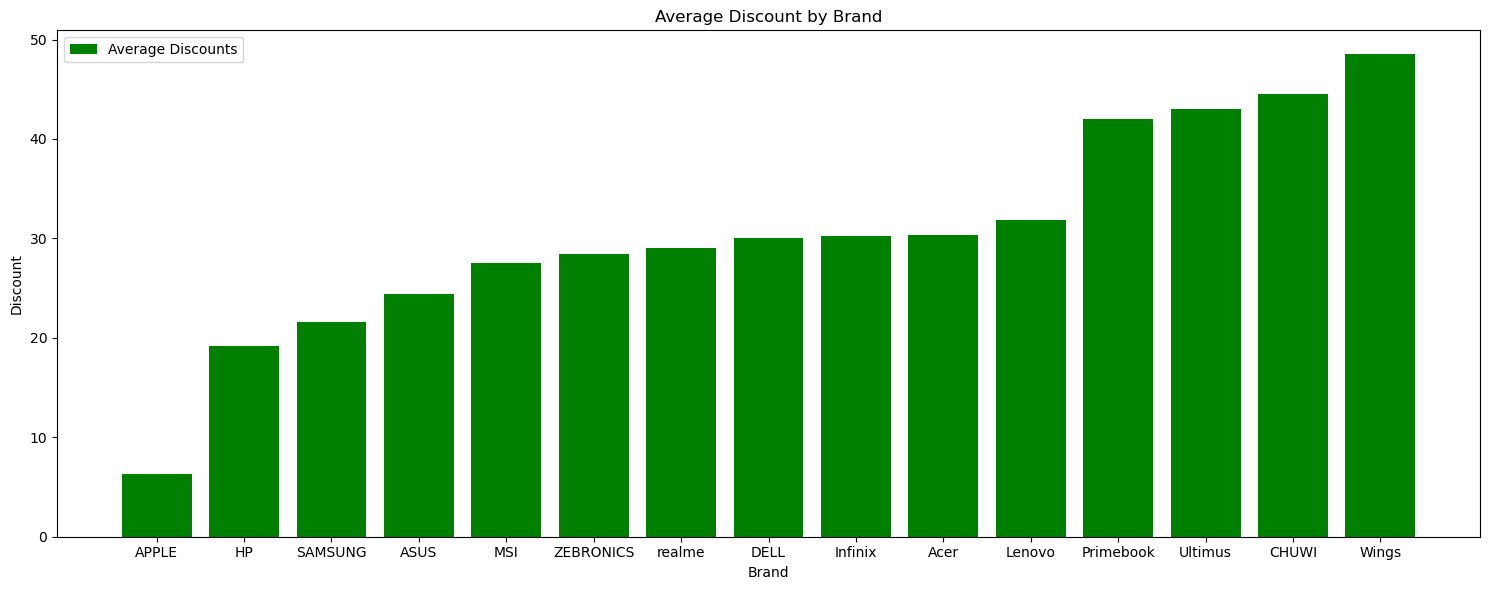

In [66]:
# Calculate average Sale Price and Discounts for each brand
brand_avg = datac.groupby('Brand')[['Sale Price', 'Discounts']].mean().reset_index().sort_values(by=["Discounts"],ascending=True)

# Plotting average Sale Price and Discounts for each brand
plt.figure(figsize=(15, 6))
plt.bar(brand_avg['Brand'], brand_avg['Discounts'], label='Average Discounts',color="g")
plt.xlabel('Brand')
plt.ylabel('Discount')
plt.title('Average Discount by Brand')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

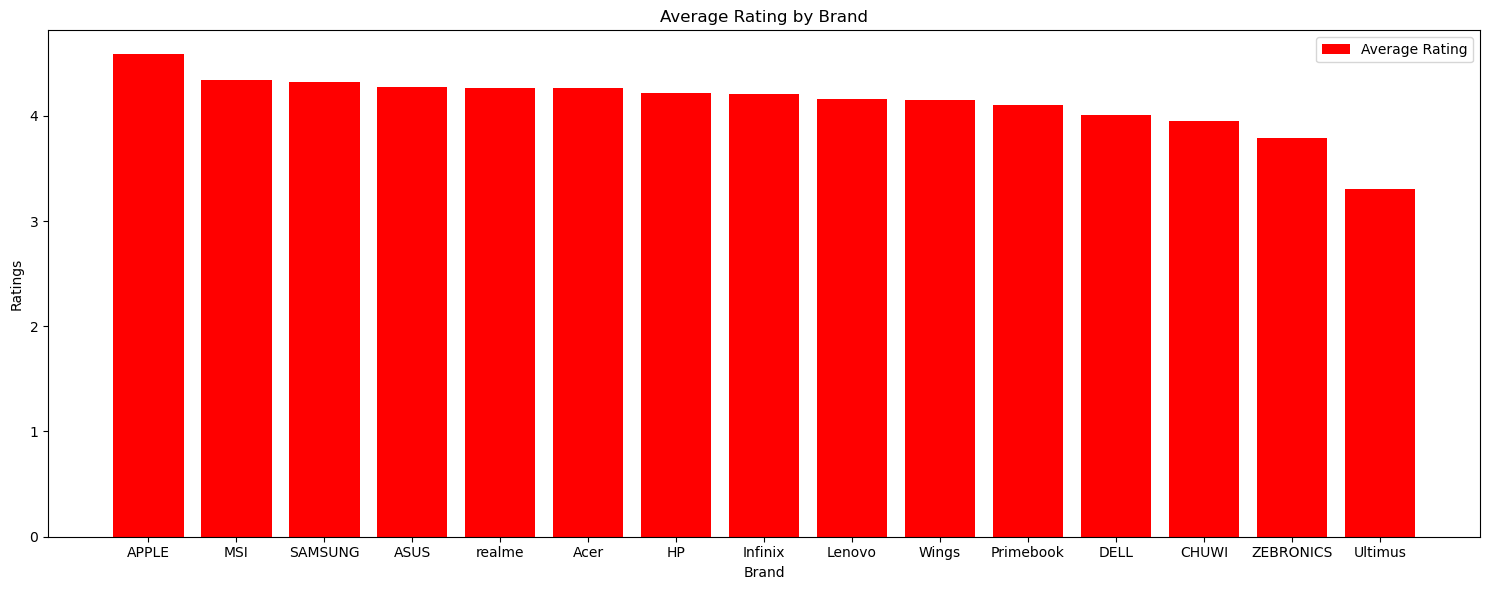

In [1087]:
# Calculate average Ratings for each brand
brand_avg = datac.groupby('Brand')['Ratings'].mean().reset_index().sort_values(by=["Ratings"],ascending=False)

# Plotting average Ratings for each brand
plt.figure(figsize=(15, 6))
plt.bar(brand_avg['Brand'], brand_avg['Ratings'], label='Average Rating',color="r")
plt.xlabel('Brand')
plt.ylabel('Ratings')
plt.title('Average Rating by Brand')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

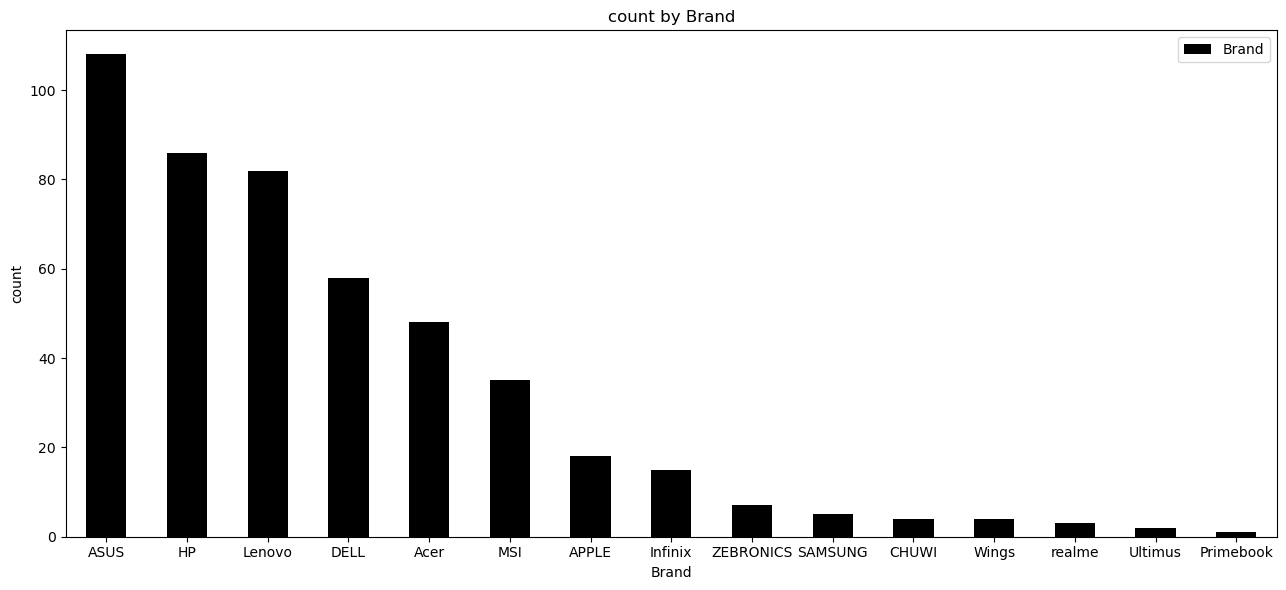

In [67]:
# Calculate qualtity sold for each brand
plt.figure(figsize=(13, 6))
datac.Brand.value_counts().sort_values(ascending=False).plot(kind='bar',color="k")

plt.xlabel('Brand')
plt.ylabel('count')
plt.title('count by Brand')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [1021]:
datac.loc[datac["Brand"]=="ASUS",["Brand","Discounts"]]

Brand  Discounts
4    ASUS       37.0
26   ASUS       24.0
42   ASUS       21.0
48   ASUS       19.0
49   ASUS       18.0
..    ...        ...
453  ASUS       14.0
455  ASUS       26.0
458  ASUS       41.0
469  ASUS       18.0
475  ASUS       25.0

[108 rows x 2 columns]

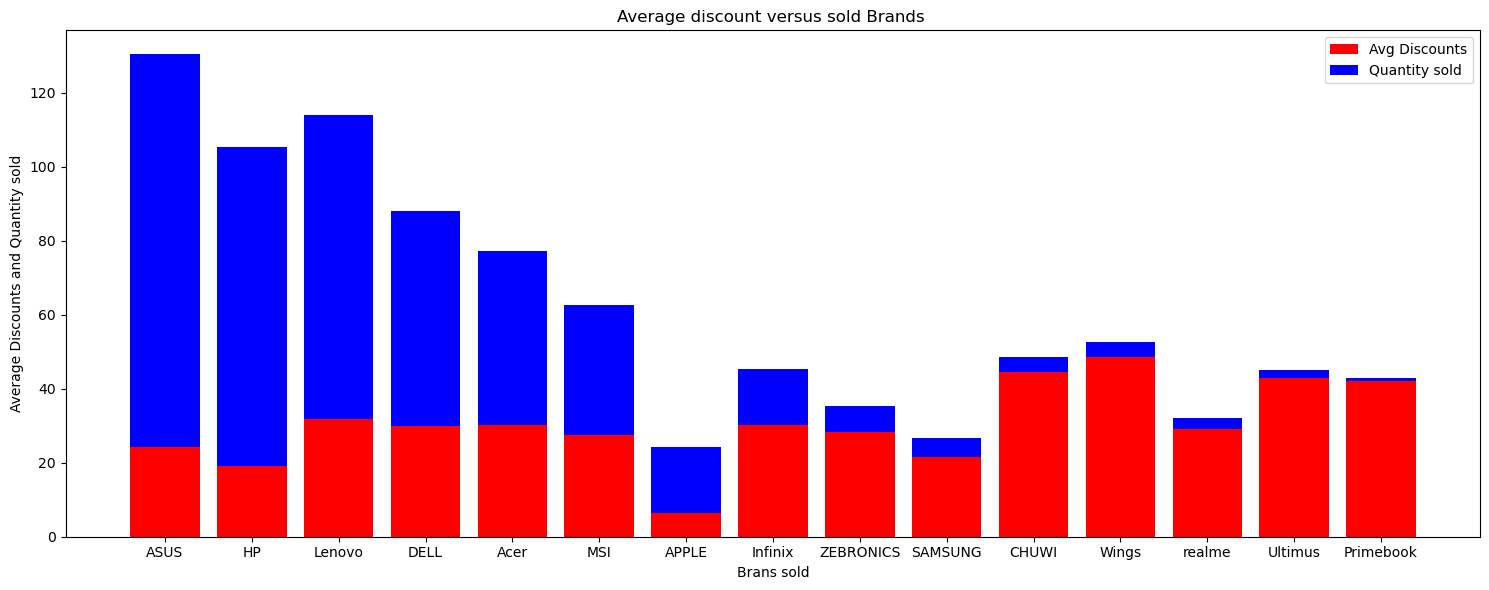

In [1057]:

# Plotting average Sale Price and Discounts for each brand
df1=datac.groupby('Brand')["Brand"].count().reset_index(name="count")
df2=datac.groupby('Brand')["Discounts"].mean().reset_index(name="Avg Discounts")
df3=pd.concat([df1.set_index('Brand'),df2.set_index('Brand')], axis=1, join='inner').reset_index()
df3=df3.sort_values(by=["count"],ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(df3['Brand'], df3["Avg Discounts"], color='r')
plt.bar(df3['Brand'], df3['count'],bottom=df3['Avg Discounts'], color='b')

plt.xlabel('Brans sold')
plt.ylabel('Average Discounts and Quantity sold')
plt.title('Average discount versus sold Brands ')
plt.xticks(rotation=0)
plt.legend(['Avg Discounts','Quantity sold'])
plt.tight_layout()
plt.show()

In [64]:
datac.columns

Index(['Brand', 'Sale Price', 'Actual Price', 'Discounts', 'Ratings',
       'Warrenty(years)', 'RAM(GB)', 'ROM', 'processor', 'size(inch)'],
      dtype='object')

In [1027]:
datac.groupby(["Brand","Warrenty(years)"])["Brand","Warrenty(years)"].value_counts()

C:\Users\HARI KRISHNA\AppData\Local\Temp\ipykernel_34588\3075176545.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  datac.groupby(["Brand","Warrenty(years)"])["Brand","Warrenty(years)"].value_counts()


Brand      Warrenty(years)
APPLE      1                   18
ASUS       0                    3
           1                  105
Acer       0                    2
           1                   46
CHUWI      1                    4
DELL       0                    7
           1                   50
           3                    1
HP         0                    5
           1                   81
Infinix    0                    3
           1                   12
Lenovo     0                    6
           1                   63
           2                    9
           3                    4
MSI        1                   11
           2                   24
Primebook  1                    1
SAMSUNG    1                    5
Ultimus    1                    2
Wings      1                    4
ZEBRONICS  1                    7
realme     1                    3
dtype: int64

In [1090]:
# Calculate top 10 laptops based on the discounts of each brand,considering the 'RAM(GB)',"processor","Discounts
brand_avg = datac.groupby('Brand')[['RAM(GB)',"processor","Discounts"]].value_counts()\
.reset_index(name="count").sort_values(by=["Discounts"],ascending=True)
brand_avg.head(10)

Brand  RAM(GB)                          processor  Discounts  count
245       HP        8            Intel Core i3 Processor        2.0      1
4      APPLE        8                 Apple M1 Processor        4.0      1
232       HP       16            Intel Core i7 Processor        5.0      1
2      APPLE        8                 Apple M2 Processor        5.0      2
6      APPLE       16             Apple M2 Pro Processor        5.0      1
7      APPLE       16             Apple M1 Pro Processor        5.0      1
79      ASUS       16    AMD Ryzen 7 Octa Core Processor        6.0      1
269  Infinix        4  Intel Celeron Quad Core Processor        6.0      1
10     APPLE        8                 Apple M1 Processor        6.0      1
0      APPLE        8                 Apple M2 Processor        6.0      4

In [1061]:
brand_avg.loc[brand_avg["Brand"]=="ASUS"]

Brand  RAM(GB)                          processor  count
15  ASUS        8    AMD Ryzen 3 Quad Core Processor      3
20  ASUS        8    AMD Ryzen 5 Hexa Core Processor      2
13  ASUS       16    AMD Ryzen 5 Hexa Core Processor      5
27  ASUS       16    AMD Ryzen 5 Octa Core Processor      1
16  ASUS        8    AMD Ryzen 5 Quad Core Processor      3
26  ASUS       16    AMD Ryzen 5 Quad Core Processor      1
25  ASUS       32    AMD Ryzen 7 Octa Core Processor      1
11  ASUS       16    AMD Ryzen 7 Octa Core Processor     11
18  ASUS       16    AMD Ryzen 9 Octa Core Processor      3
30  ASUS       32    AMD Ryzen 9 Octa Core Processor      1
22  ASUS       16    AMD Ryzen Z1 HexaCore Processor      1
14  ASUS        4  Intel Celeron Dual Core Processor      5
17  ASUS        8  Intel Celeron Dual Core Processor      3
8   ASUS        8            Intel Core i3 Processor     20
29  ASUS        4            Intel Core i3 Processor      1
19  ASUS       16            Intel Core i3 Processor      3
9   ASUS       16            Intel Core i5 Processor     17
10  ASUS        8            Intel Core i5 Processor     14
12  ASUS       16            Intel Core i7 Processor      8
23  ASUS       16            Intel Core i9 Processor      1
21  ASUS       32            Intel Core i9 Processor      2
24  ASUS        8       Intel Hexa Core i5 Processor      1
28  ASUS        4     Intel Pentium Silver Processor      1

In [1091]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss
import random as rd  
import statsmodels.api as sm

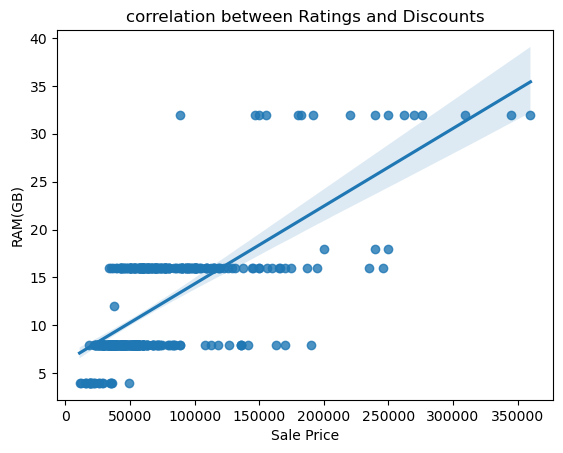

In [94]:
sns.regplot(x=datac["Sale Price"],y=datac["RAM(GB)"])
plt.title("correlation between Ratings and Discounts")
plt.show()

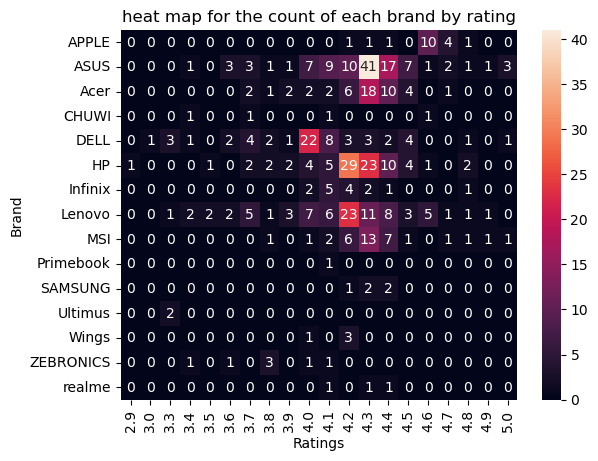

In [69]:
sns.heatmap(pd.crosstab(index=datac["Brand"],columns=datac["Ratings"]),annot=True,fmt=".3g")
plt.title("heat map for the count of each brand by rating")
plt.show()

In [1093]:
datac.columns


Index(['Brand', 'Sale Price', 'Actual Price', 'Discounts', 'Ratings',
       'Warrenty(years)', 'RAM(GB)', 'ROM', 'processor', 'size(inch)',
       'storage type'],
      dtype='object')

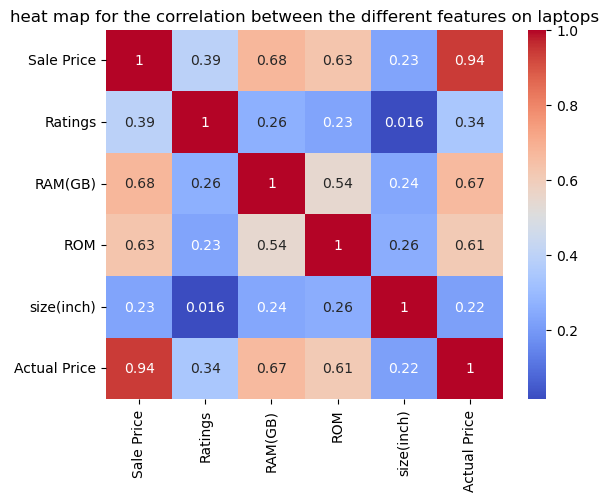

In [1063]:
sns.heatmap(datac[["Sale Price","Ratings","RAM(GB)","ROM","size(inch)","Actual Price"]].corr(method="spearman"),annot=True,cmap='coolwarm')
plt.title("heat map for the correlation between the different features on laptops")
plt.show()

In [95]:
# Calculate top 10 laptops based on the discounts of each brand,considering the 'RAM(GB)',"processor","Discounts
brand_avg = datac.groupby('Brand')[['RAM(GB)',"processor","Discounts","Sale Price"]].value_counts()\
.reset_index(name="count").sort_values(by=["Discounts"],ascending=True)
brand_avg.head(10)

Brand  RAM(GB)                          processor  Discounts  \
260       HP        8            Intel Core i3 Processor        2.0   
1      APPLE        8                 Apple M1 Processor        4.0   
232       HP       16            Intel Core i7 Processor        5.0   
6      APPLE       16             Apple M2 Pro Processor        5.0   
7      APPLE       16             Apple M1 Pro Processor        5.0   
13     APPLE        8                 Apple M2 Processor        5.0   
12     APPLE        8                 Apple M2 Processor        5.0   
0      APPLE        8                 Apple M2 Processor        6.0   
320  Infinix        4  Intel Celeron Quad Core Processor        6.0   
15     APPLE        8                 Apple M1 Processor        6.0   

     Sale Price  count  
260       47600      1  
1        112990      1  
232      112490      1  
6        234990      1  
7        245990      1  
13       126990      1  
12       140990      1  
0        135990      3  
320       27990      1  
15       117900      1

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss
import random as rd  
import statsmodels.api as sm

In [1023]:
datac.head(5)

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty(years)  \
0      HP       47990       63628.0       24.0      4.2               1   
1      HP       52990       66769.0       20.0      4.1               1   
2  Lenovo       24990       42032.0       40.0      4.0               1   
3      HP       29490       39995.0       26.0      4.2               1   
4    ASUS       43990       69990.0       37.0      4.3               1   

   RAM(GB)  ROM                          processor  size(inch) storage type  
0        8  512    AMD Ryzen 5 Hexa Core Processor        15.6          SSD  
1        8  512    AMD Ryzen 5 Hexa Core Processor        15.6          SSD  
2        8  256  Intel Celeron Dual Core Processor        15.6          SSD  
3        8  512    AMD Ryzen 3 Dual Core Processor        15.6          SSD  
4        8  512            Intel Core i5 Processor        15.6          SSD

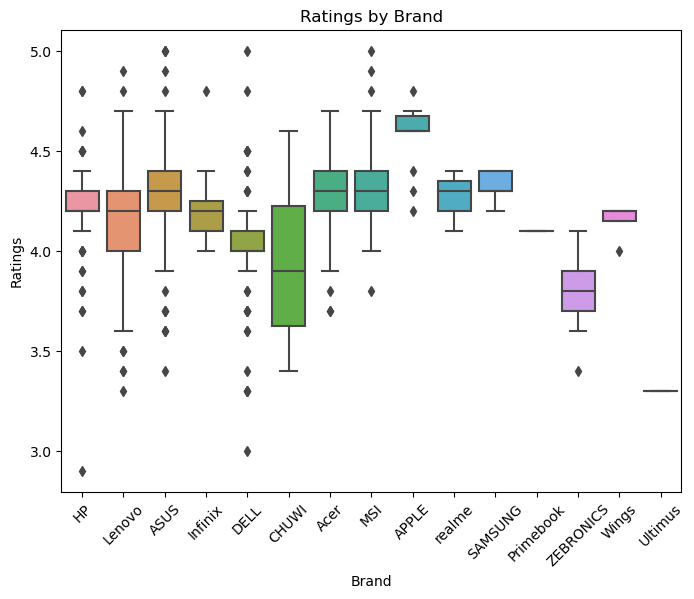

In [181]:
# Boxplot for 'Ratings' by 'Brand'
plt.figure(figsize=(8, 6))
sns.boxplot(data=datac, x='Brand', y='Ratings')
plt.title('Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()


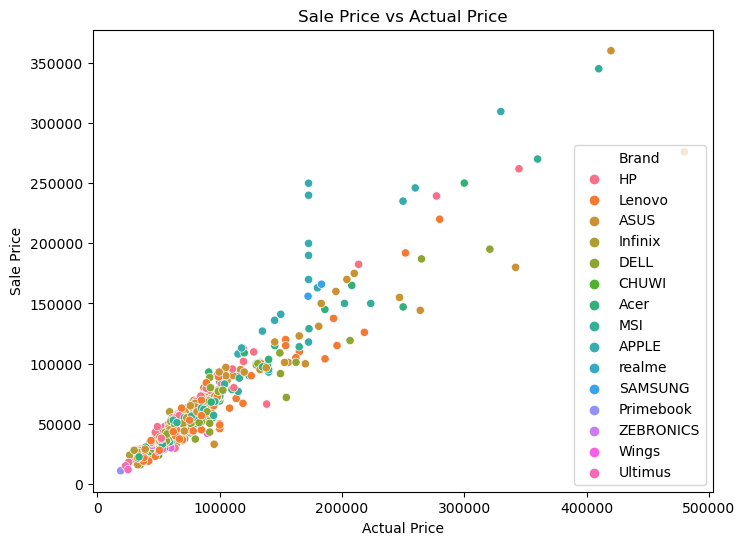

In [179]:

# Scatterplot: 'Sale Price' vs 'Actual Price'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datac, x='Actual Price', y='Sale Price', hue='Brand')
plt.title('Sale Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Sale Price')
plt.legend(title='Brand')
plt.show()

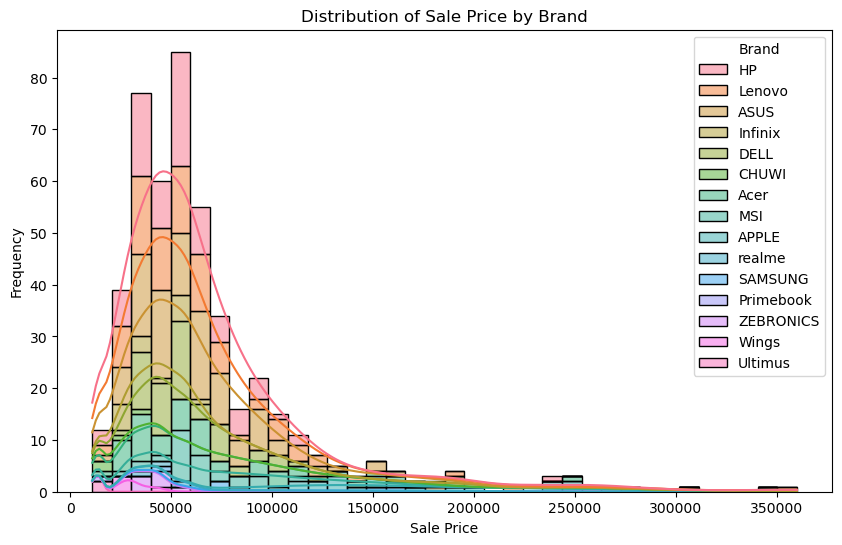

In [1024]:
# Distribution plot for 'Sale Price' by Brand
plt.figure(figsize=(10, 6))
sns.histplot(data=datac, x='Sale Price', hue='Brand', kde=True, multiple='stack')
plt.title('Distribution of Sale Price by Brand')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

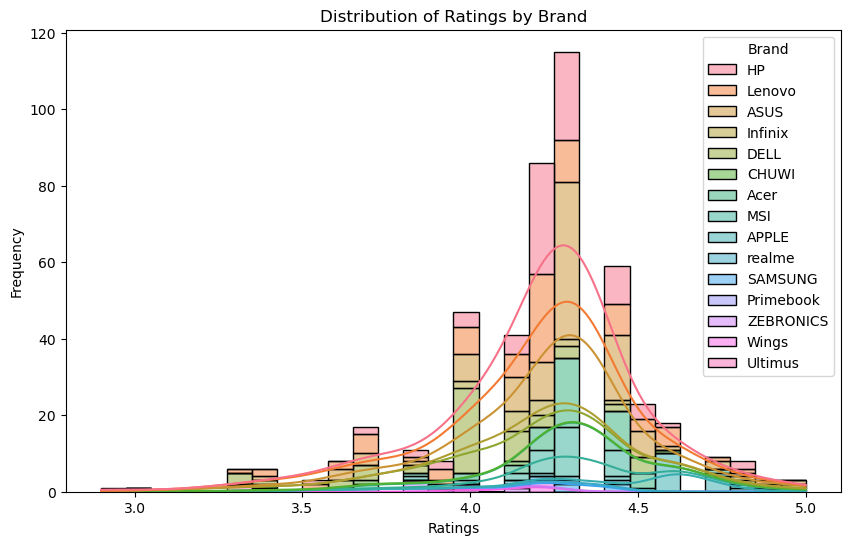

In [1025]:
# Distribution plot for 'Ratings' by Brand
plt.figure(figsize=(10, 6))
sns.histplot(data=datac, x='Ratings', hue='Brand', kde=True, multiple='stack')
plt.title('Distribution of Ratings by Brand')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

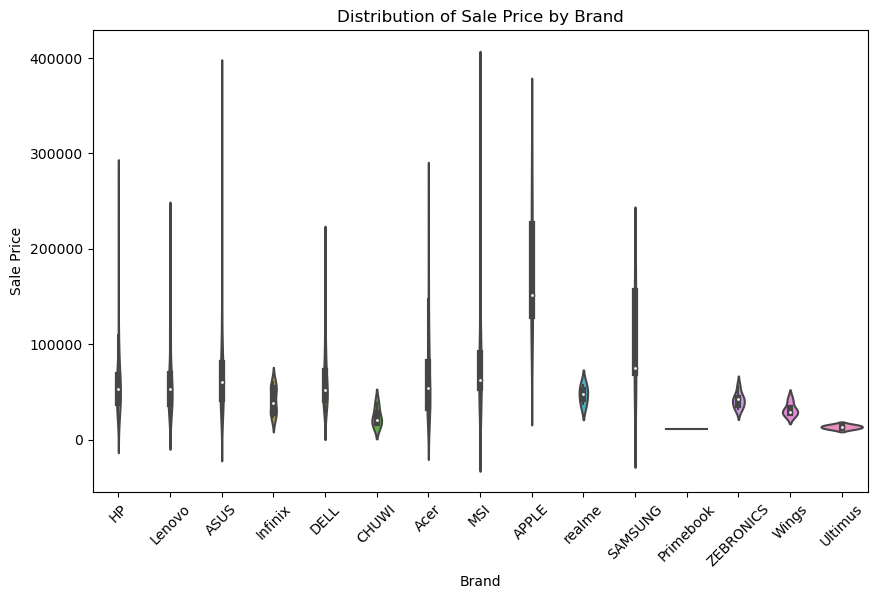

In [186]:
# Violin plot for 'Sale Price' by Brand
plt.figure(figsize=(10, 6))
sns.violinplot(data=datac, x='Brand', y='Sale Price')
plt.title('Distribution of Sale Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

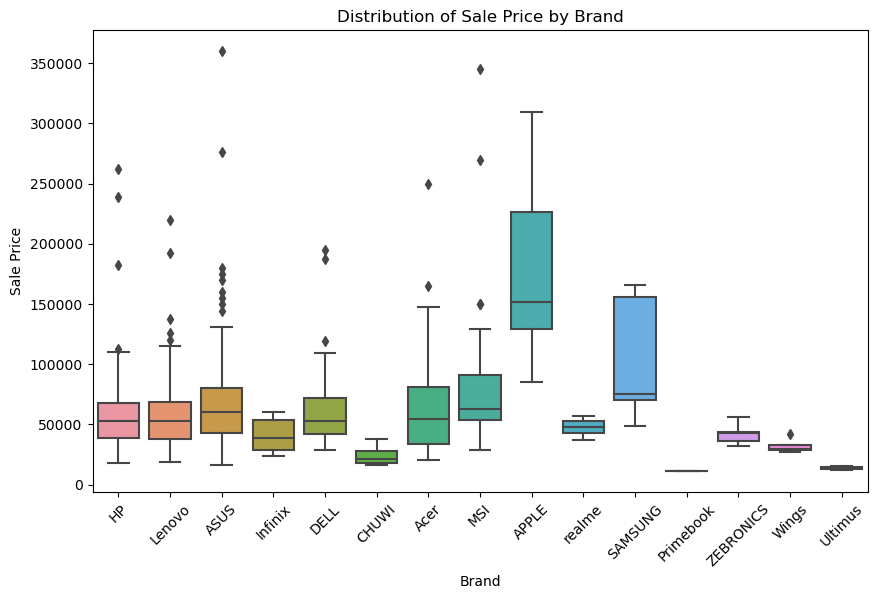

In [188]:
# Box plot for 'Sale Price' by Brand
plt.figure(figsize=(10, 6))
sns.boxplot(data=datac, x='Brand', y='Sale Price')
plt.title('Distribution of Sale Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


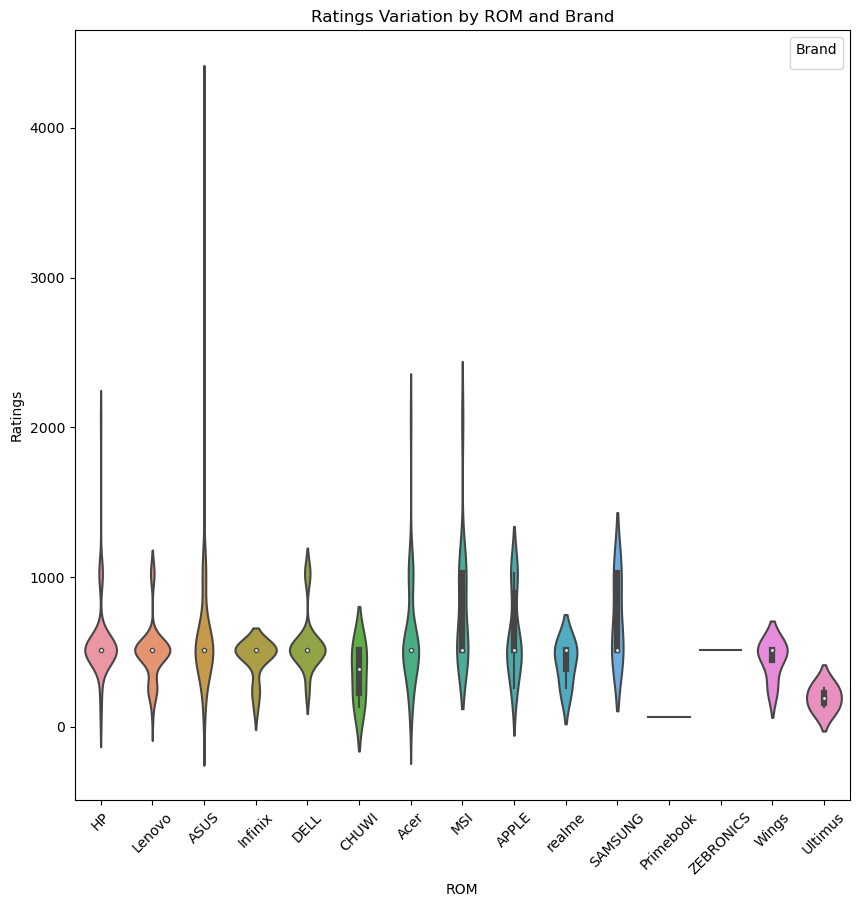

In [1053]:
# Violin plot for 'Ratings' by ROM and Brand
plt.figure(figsize=(10,10))
sns.violinplot(data=datac, y='ROM', x='Brand',split=True)
plt.title('Ratings Variation by ROM and Brand')
plt.xlabel('ROM')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

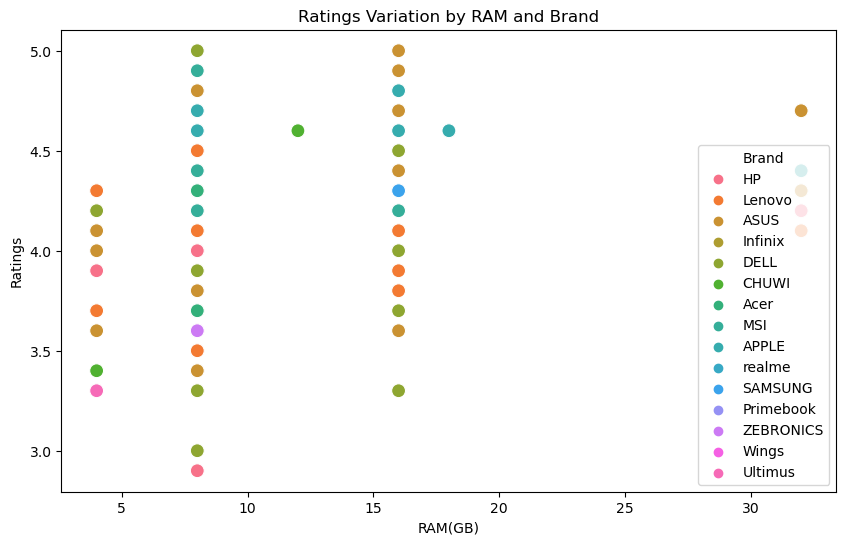

In [195]:
# Scatter plot for 'Ratings' by RAM and Brand
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datac, x='RAM(GB)', y='Ratings', hue='Brand', s=100)
plt.title('Ratings Variation by RAM and Brand')
plt.xlabel('RAM(GB)')
plt.ylabel('Ratings')
plt.legend(title='Brand')
plt.show()

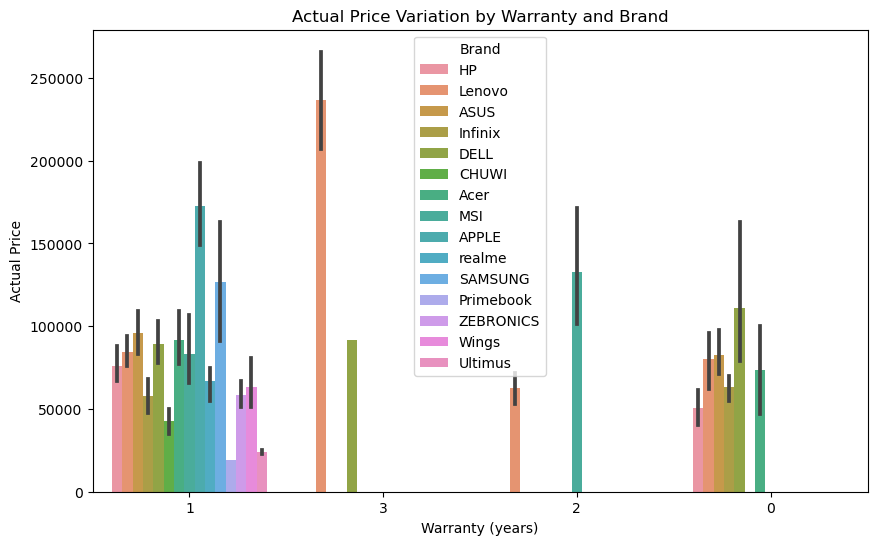

In [303]:
# Bar plot for 'Actual Price' by Warranty and Brand
plt.figure(figsize=(10, 6))
sns.barplot(data=datac, x='Warrenty(years)', y='Actual Price', hue='Brand')
plt.title('Actual Price Variation by Warranty and Brand')
plt.xlabel('Warranty (years)')
plt.ylabel('Actual Price')
plt.legend(title='Brand')
plt.show()

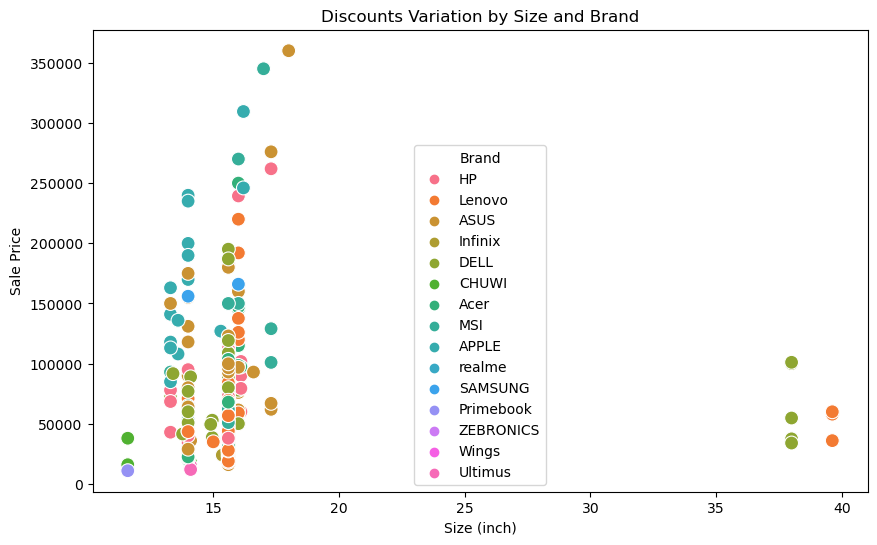

In [1042]:
# Scatter plot for 'Discounts' by Size and Brand
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datac, x='size(inch)', y='Sale Price', hue='Brand', s=100)
plt.title(' Variation by Size and Brand')
plt.xlabel('Size (inch)')
plt.ylabel('Sale Price')
plt.legend(title='Brand')
plt.show()

In [293]:
datac.columns

Index(['Brand', 'Sale Price', 'Actual Price', 'Discounts', 'Ratings',
       'Warrenty(years)', 'RAM(GB)', 'ROM', 'processor', 'size(inch)'],
      dtype='object')

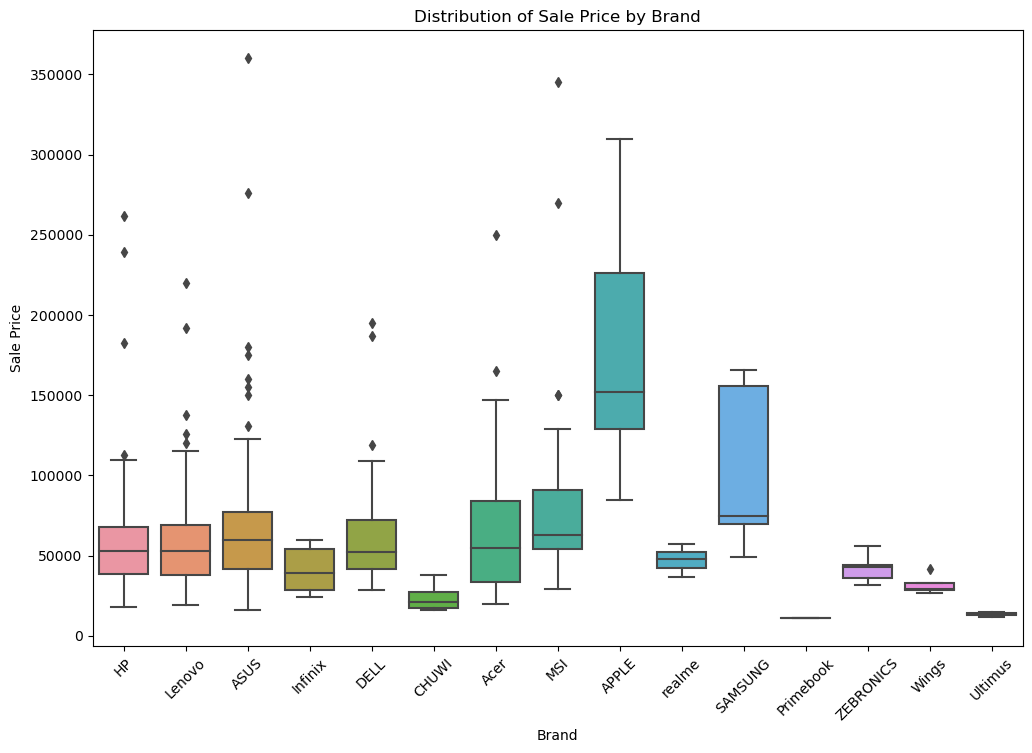

In [1058]:
# Box plot for 'Sale Price' by Brand
plt.figure(figsize=(12, 8))
sns.boxplot(data=datac, x='Brand', y='Sale Price')
plt.title('Distribution of Sale Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()



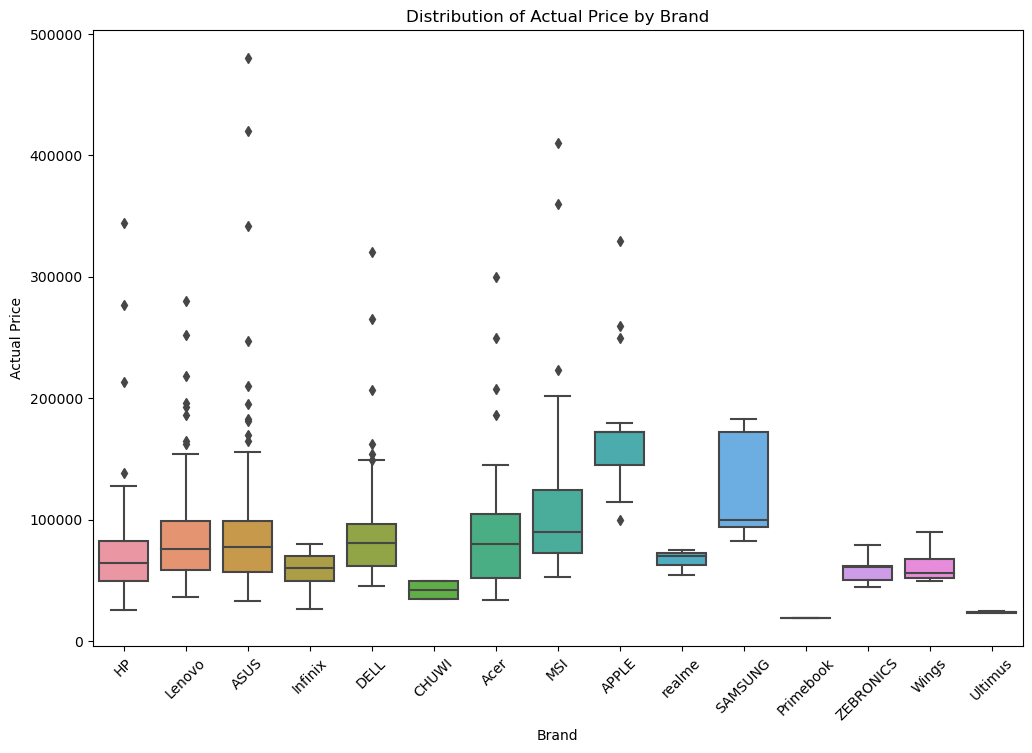

In [1059]:
# Box plot for 'Actual Price' by Brand
plt.figure(figsize=(12, 8))
sns.boxplot(data=datac, x='Brand', y='Actual Price')
plt.title('Distribution of Actual Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Actual Price')
plt.xticks(rotation=45)
plt.show()

In [298]:
datac.columns

Index(['Brand', 'Sale Price', 'Actual Price', 'Discounts', 'Ratings',
       'Warrenty(years)', 'RAM(GB)', 'ROM', 'processor', 'size(inch)'],
      dtype='object')

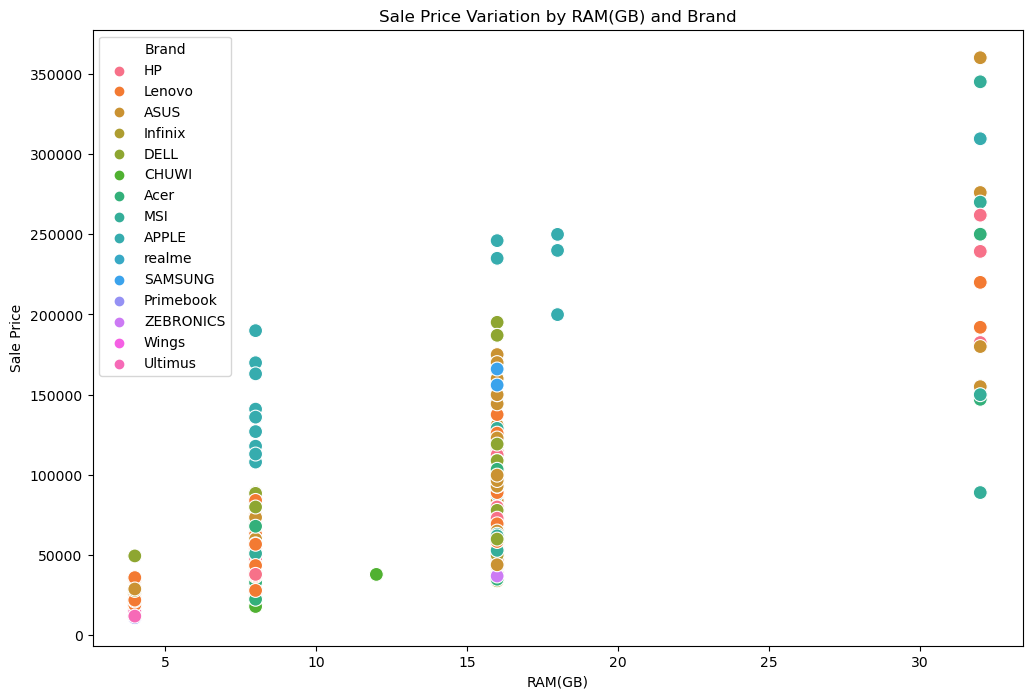

In [397]:
# Scatter plot for 'Discounts' by 'RAM(GB)' and Brand
plt.figure(figsize=(12, 8))
sns.scatterplot(data=datac, x='RAM(GB)', y='Sale Price', hue='Brand', s=100)
plt.title('Sale Price Variation by RAM(GB) and Brand')
plt.xlabel('RAM(GB)')
plt.ylabel('Sale Price')
plt.legend(title='Brand')
plt.show()

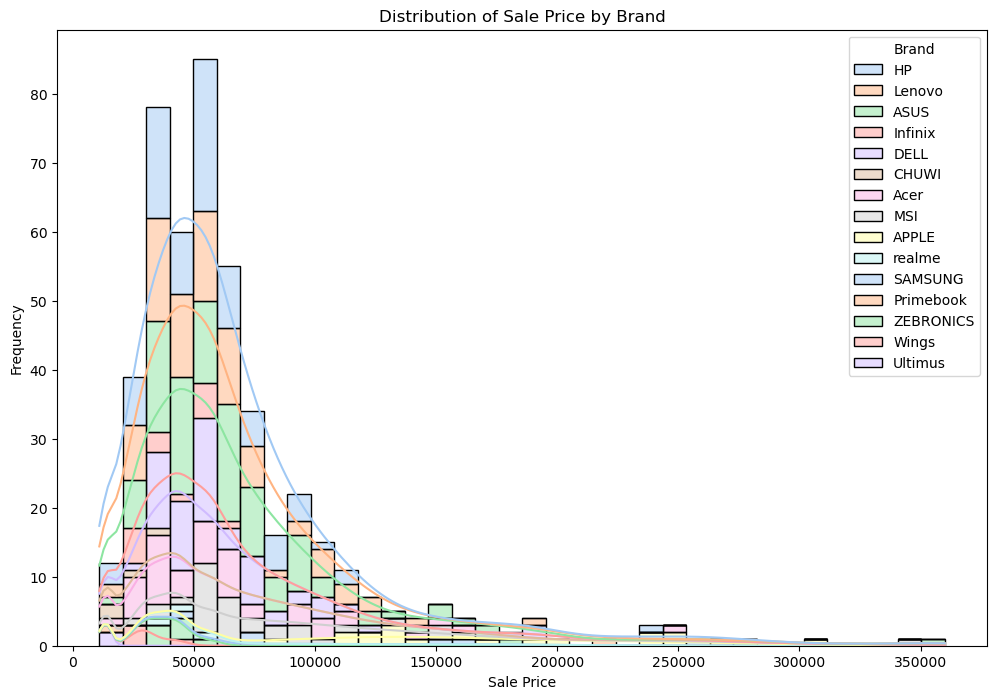

In [399]:
 # Histogram for 'Sale Price' by Brand
plt.figure(figsize=(12, 8))
sns.histplot(data=datac, x='Sale Price', hue='Brand', kde=True, multiple='stack',palette="pastel")
plt.title('Distribution of Sale Price by Brand')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

plt.show()

C:\Users\HARI KRISHNA\AppData\Local\Temp\ipykernel_12096\3544341703.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=datac, x='Sale Price', hue='Brand', fill=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


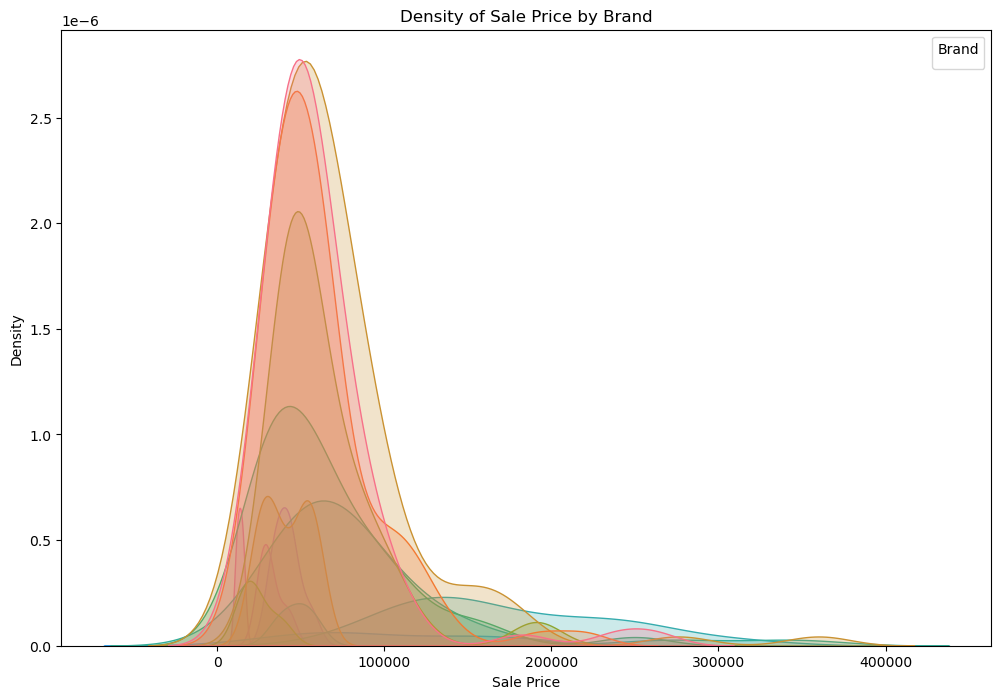

In [312]:
# Density plot for 'Sale Price' by Brand
plt.figure(figsize=(12, 8))
sns.kdeplot(data=datac, x='Sale Price', hue='Brand', fill=True)
plt.title('Density of Sale Price by Brand')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.legend(title='Brand')
plt.show()

In [575]:
datac.columns

Index(['Brand', 'Sale Price', 'Actual Price', 'Discounts', 'Ratings',
       'Warrenty(years)', 'RAM(GB)', 'ROM', 'processor', 'size(inch)',
       'storage type'],
      dtype='object')

<Axes: xlabel='RAM(GB)', ylabel='ROM'>

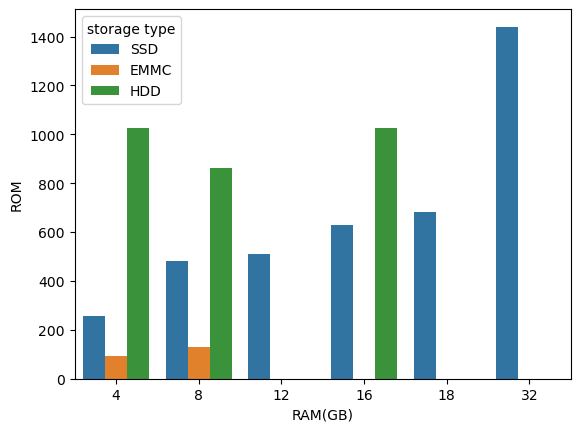

In [1022]:
sns.barplot(datac,x='RAM(GB)',y='ROM',hue='storage type',errorbar=None)

C:\Users\HARI KRISHNA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HARI KRISHNA\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


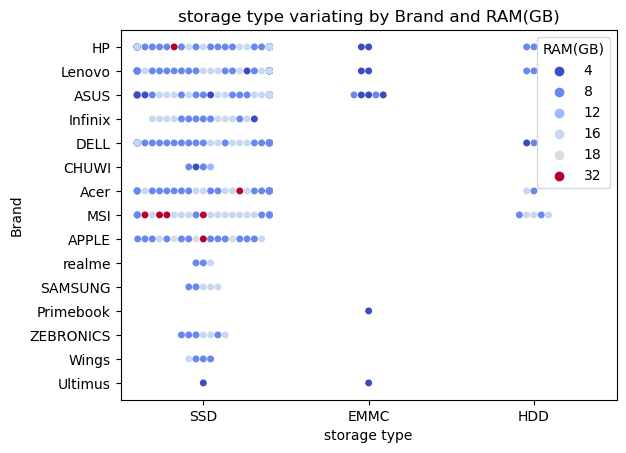

In [1060]:
sns.swarmplot(datac,x="storage type",y="Brand",hue="RAM(GB)",palette="coolwarm")
plt.title('storage type variating by Brand and RAM(GB)')
plt.xlabel('storage type')
plt.ylabel('Brand')
plt.show()

In [1056]:
datac

Brand  Sale Price  Actual Price  Discounts  Ratings Warrenty(years)  \
0         HP       47990       63628.0       24.0      4.2               1   
1         HP       52990       66769.0       20.0      4.1               1   
2     Lenovo       24990       42032.0       40.0      4.0               1   
3         HP       29490       39995.0       26.0      4.2               1   
4       ASUS       43990       69990.0       37.0      4.3               1   
..       ...         ...           ...        ...      ...             ...   
472     Acer       67990       92999.0       26.0      4.3               1   
474       HP       37999       52251.0       27.0      4.0               1   
475     ASUS       28900       38990.0       25.0      4.1               1   
476    APPLE      189900      172650.0        6.0      4.6               1   
477  SAMSUNG      155990      172214.0        9.0      4.3               1   

     RAM(GB)   ROM                          processor  size(inch) storage type  
0          8   512    AMD Ryzen 5 Hexa Core Processor        15.6          SSD  
1          8   512    AMD Ryzen 5 Hexa Core Processor        15.6          SSD  
2          8   256  Intel Celeron Dual Core Processor        15.6          SSD  
3          8   512    AMD Ryzen 3 Dual Core Processor        15.6          SSD  
4          8   512            Intel Core i5 Processor        15.6          SSD  
..       ...   ...                                ...         ...          ...  
472        8   512    AMD Ryzen 5 Hexa Core Processor        15.6          SSD  
474        8   512    AMD Ryzen 5 Dual Core Processor        15.6          SSD  
475        4   256     Intel Pentium Silver Processor        14.0          SSD  
476        8  1024                 Apple M3 Processor        14.0          SSD  
477       16  1024            Intel Core i7 Processor        14.0          SSD  

[473 rows x 11 columns]